# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing alorithhms which can discover patterns in visual data. Such as the camera of self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we're modified it to only use two classes (pizza & steak) using the image data modification notebook:https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (orbetter yet what doesn't work) before scaling up.

In [3]:
import zipfile
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_stake.zip")
# zip_ref.extractall()
# zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is become one with the data.

And for a computer vision project ... this usually means visualizing many samples of your data.

In [4]:
!ls pizza_steak

test
train


In [5]:
! ls pizza_steak/train/

pizza
steak


In [6]:
!ls pizza_steak/train/steak/

1000205.jpg
100135.jpg
101312.jpg
1021458.jpg
1032846.jpg
10380.jpg
1049459.jpg
1053665.jpg
1068516.jpg
1068975.jpg
1081258.jpg
1090122.jpg
1093966.jpg
1098844.jpg
1100074.jpg
1105280.jpg
1117936.jpg
1126126.jpg
114601.jpg
1147047.jpg
1147883.jpg
1155665.jpg
1163977.jpg
1190233.jpg
1208405.jpg
1209120.jpg
1212161.jpg
1213988.jpg
1219039.jpg
1225762.jpg
1230968.jpg
1236155.jpg
1241193.jpg
1248337.jpg
1257104.jpg
126345.jpg
1264050.jpg
1264154.jpg
1264858.jpg
127029.jpg
1289900.jpg
1290362.jpg
1295457.jpg
1312841.jpg
1313316.jpg
1324791.jpg
1327567.jpg
1327667.jpg
1333055.jpg
1334054.jpg
1335556.jpg
1337814.jpg
1340977.jpg
1343209.jpg
134369.jpg
1344105.jpg
134598.jpg
1346387.jpg
1348047.jpg
1351372.jpg
1362989.jpg
1367035.jpg
1371177.jpg
1375640.jpg
1382427.jpg
1392718.jpg
1395906.jpg
1400760.jpg
1403005.jpg
1404770.jpg
140832.jpg
141056.jpg
141135.jpg
1413972.jpg
1421393.jpg
1428947.jpg
1433912.jpg
143490.jpg
1445352.jpg
1446401.jpg
1453991.jpg
1456841.jpg
146833.jpg
1476404.jpg
148508

In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically. 

In [9]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

['1267359.jpg']
Image shape: (512, 384, 3)


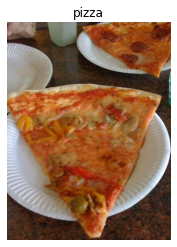

In [17]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                       target_class="pizza")

In [21]:
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[125,  90,  71],
        [129,  94,  75],
        [137,  98,  81],
        ...,
        [129,  37,  14],
        [140,  44,  22],
        [151,  55,  33]],

       [[129,  94,  75],
        [130,  93,  75],
        [131,  92,  75],
        ...,
        [134,  44,  18],
        [142,  51,  24],
        [150,  59,  32]],

       [[130,  93,  77],
        [133,  96,  80],
        [134,  95,  80],
        ...,
        [137,  53,  19],
        [143,  59,  23],
        [148,  64,  28]],

       ...,

       [[ 53,  36,  26],
        [ 54,  38,  25],
        [ 56,  38,  26],
        ...,
        [ 62,  38,  28],
        [ 63,  36,  25],
        [ 61,  33,  22]],

       [[ 61,  43,  33],
        [ 59,  41,  29],
        [ 59,  39,  28],
        ...,
        [ 65,  38,  29],
        [ 68,  38,  28],
        [ 67,  37,  26]],

       [[ 69,  51,  41],
        [ 64,  46,  34],
        [ 62,  42,  31],
        ...,
        [ 67,  39,  2

In [23]:
# View thr image shape
img.shape # returns width, height, colour channels

(512, 384, 3)

In [24]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.49019608, 0.35294118, 0.27843137],
        [0.50588235, 0.36862745, 0.29411765],
        [0.5372549 , 0.38431373, 0.31764706],
        ...,
        [0.50588235, 0.14509804, 0.05490196],
        [0.54901961, 0.17254902, 0.08627451],
        [0.59215686, 0.21568627, 0.12941176]],

       [[0.50588235, 0.36862745, 0.29411765],
        [0.50980392, 0.36470588, 0.29411765],
        [0.51372549, 0.36078431, 0.29411765],
        ...,
        [0.5254902 , 0.17254902, 0.07058824],
        [0.55686275, 0.2       , 0.09411765],
        [0.58823529, 0.23137255, 0.1254902 ]],

       [[0.50980392, 0.36470588, 0.30196078],
        [0.52156863, 0.37647059, 0.31372549],
        [0.5254902 , 0.37254902, 0.31372549],
        ...,
        [0.5372549 , 0.20784314, 0.0745098 ],
        [0.56078431, 0.23137255, 0.09019608],
        [0.58039216, 0.25098039, 0.10980392]],

       ...,

       [[0.20784314, 0.14117647, 0.10196078],
        [0.21176471, 0.14901961, 0.09803922],
        [0.21960784, 0